## Setup

In [1]:
%matplotlib inline
import os
from glob import glob
from bs4 import BeautifulSoup
import numpy as np
from matplotlib import pyplot as plt

## Read in all bus routes from KML data and plot route coordinates

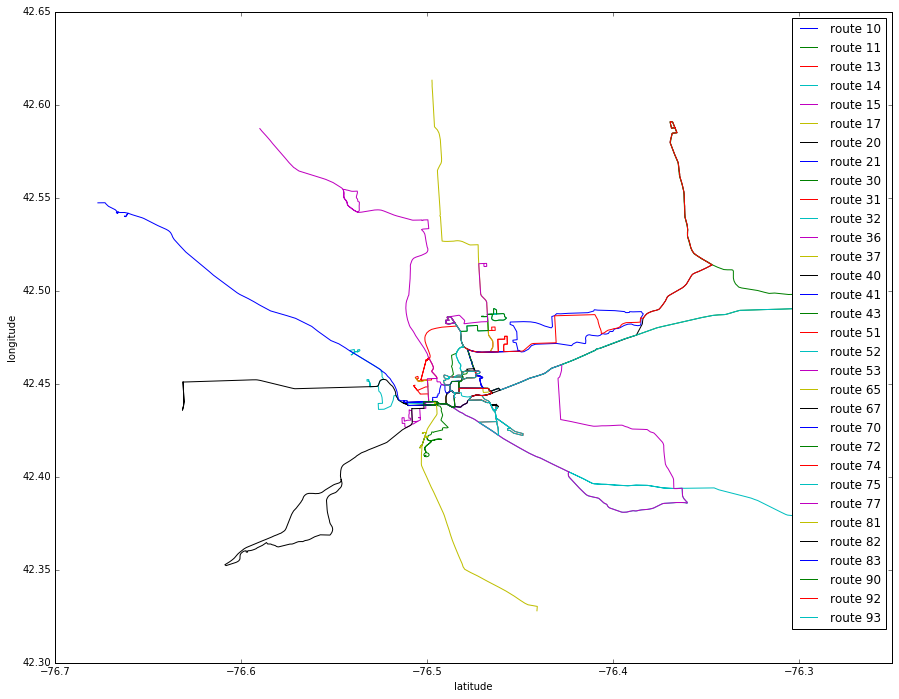

In [2]:
# Folder with route coordinates in KML format
kml_folder = './data/route-locations/route*.kml'
all_kml_files = glob(kml_folder)

# Initialize plot
fig = plt.figure(figsize=(15,15), dpi=200)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# For each route...
for kml_file in all_kml_files:

    # extract route name
    route_name = os.path.basename(kml_file).replace('.kml', '').replace('route','route ')

    # from kml file, extract coordinate data as a unicode string
    kml_data = BeautifulSoup(open(kml_file), 'lxml')
    coords = kml_data.find('coordinates').getText()

    # convert coordinates from string to Nx2 numpy array
    coords = coords.replace('0 ', '').strip().strip(',').split(',')
    coords = np.asarray(coords, dtype=float).reshape((len(coords)/2,2))

    # plot the coordinates
    lat = coords[:,0]
    lon = coords[:,1]
    plt.plot(lat, lon, label=route_name)

# add legend and axis labels and show the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
plt.show()